# Notebook applying augmentations to the dataset
Utilising the following library; https://imgaug.readthedocs.io/en/latest/index.html 
The notebook will output a new set of images that are augmented versions of the originals, as long as an exisiting folder is pointed to in the final cell.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys 
sys.path.append('../src/')
from data_process import label_2_colour

import imgaug.augmenters as iaa

## Google Colab

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# !ls drive/'My Drive'
# array_path = '/content/drive/My Drive/Colab Notebooks/augment_us.npy'
# arrays = np.load(array_path)

## Locally

In [10]:
array_path = '../data/augmentation/augment_us.npy'
arrays = np.load(array_path)
arrays.shape

(10, 256, 256, 4)

In [16]:
def display_augmentation(org_imgs, augmented_imgs, n=2):
    """Function displaying the original and augmented images side by side

    Args:
        org_imgs (numpy array): array with all the loaded arrays
        augmented_imgs (numpy array): array with all the augmented arrays
        n (int, optional): Number of cars to display. Defaults to 2, can also display 3.
    """
    fig, ax = plt.subplots(n,4, figsize=(20,n*5))
    for i in range(n):
        org = org_imgs[i,:,:,0:3]
        org_mask = org_imgs[i,:,:,3]
        aug = augmented_imgs[i,:,:,0:3]
        aug_mask = augmented_imgs[i,:,:,3]
        ax[i,0].imshow(org)
        ax[i,0].set_title('original_image')
        ax[i,1].imshow(label_2_colour(org_mask))
        ax[i,1].set_title('original_label')
        ax[i,2].imshow(aug)
        ax[i,2].set_title('augmented_image')
        ax[i,3].imshow(label_2_colour(aug_mask))
        ax[i,3].set_title('augmented_label')

    plt.show()

## Separate the images from the segmentations

In [12]:
images = arrays[:,:,:,0:3]
segmaps = arrays[:,:,:,-1,None]

# Perform flipping of the images
Flips the images left to right. 

In [13]:
seq = iaa.Sequential([iaa.Fliplr(1)])   # Flips all images (1.0 = 100%)
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
flip_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)       # Concatenates the flipped images

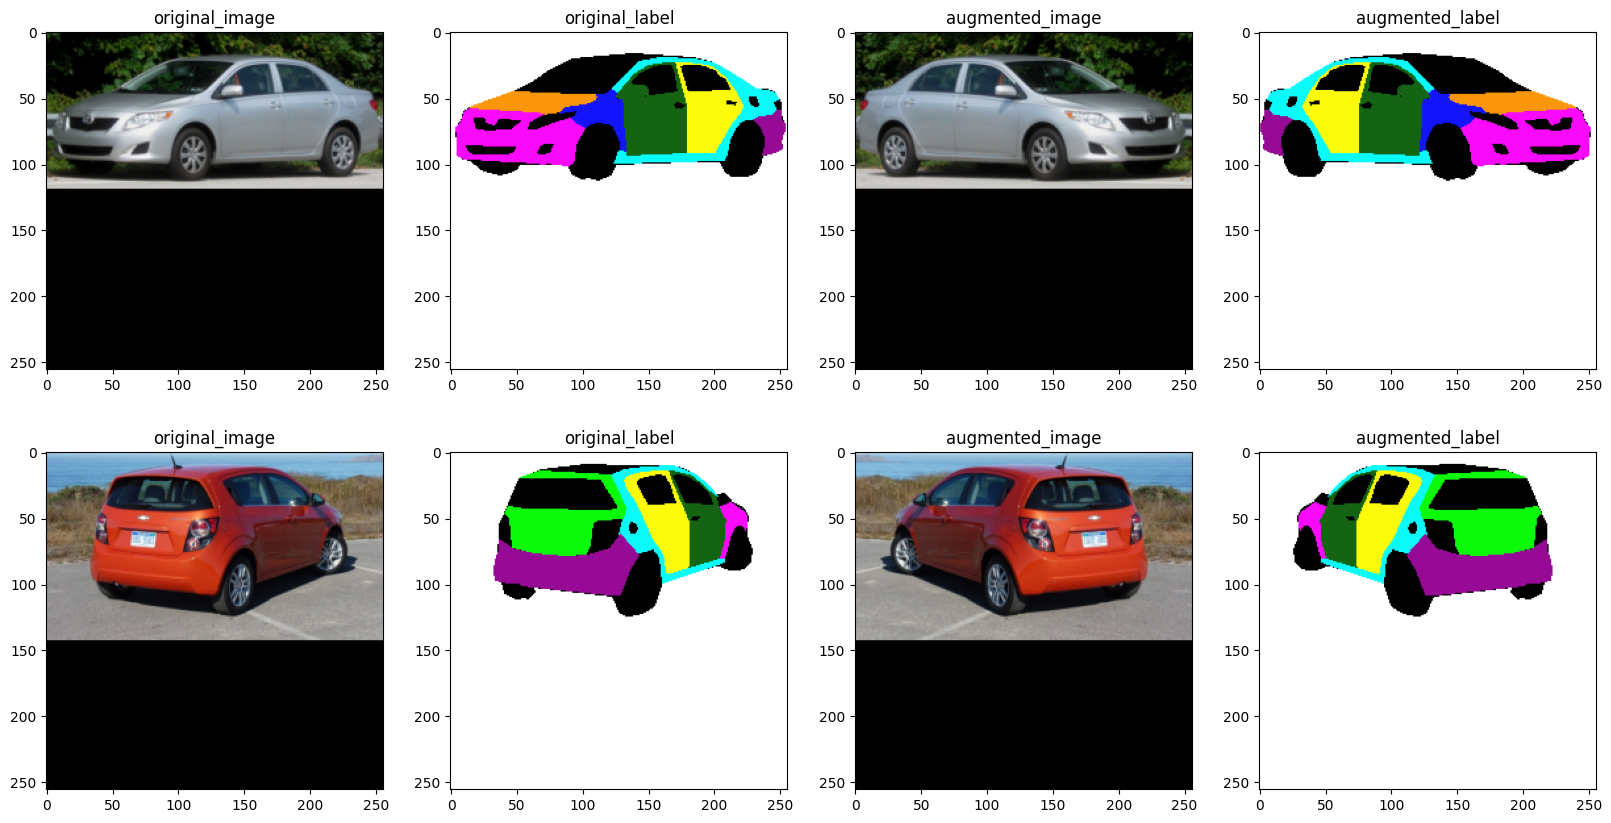

In [15]:
display_augmentation(arrays, flip_arr, n=2)

# Rotate the images 
Rotates the images with a random angle between -25 and 25.

In [18]:
seq = iaa.Sequential([iaa.Affine(rotate=(-25, 25))])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
rot_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

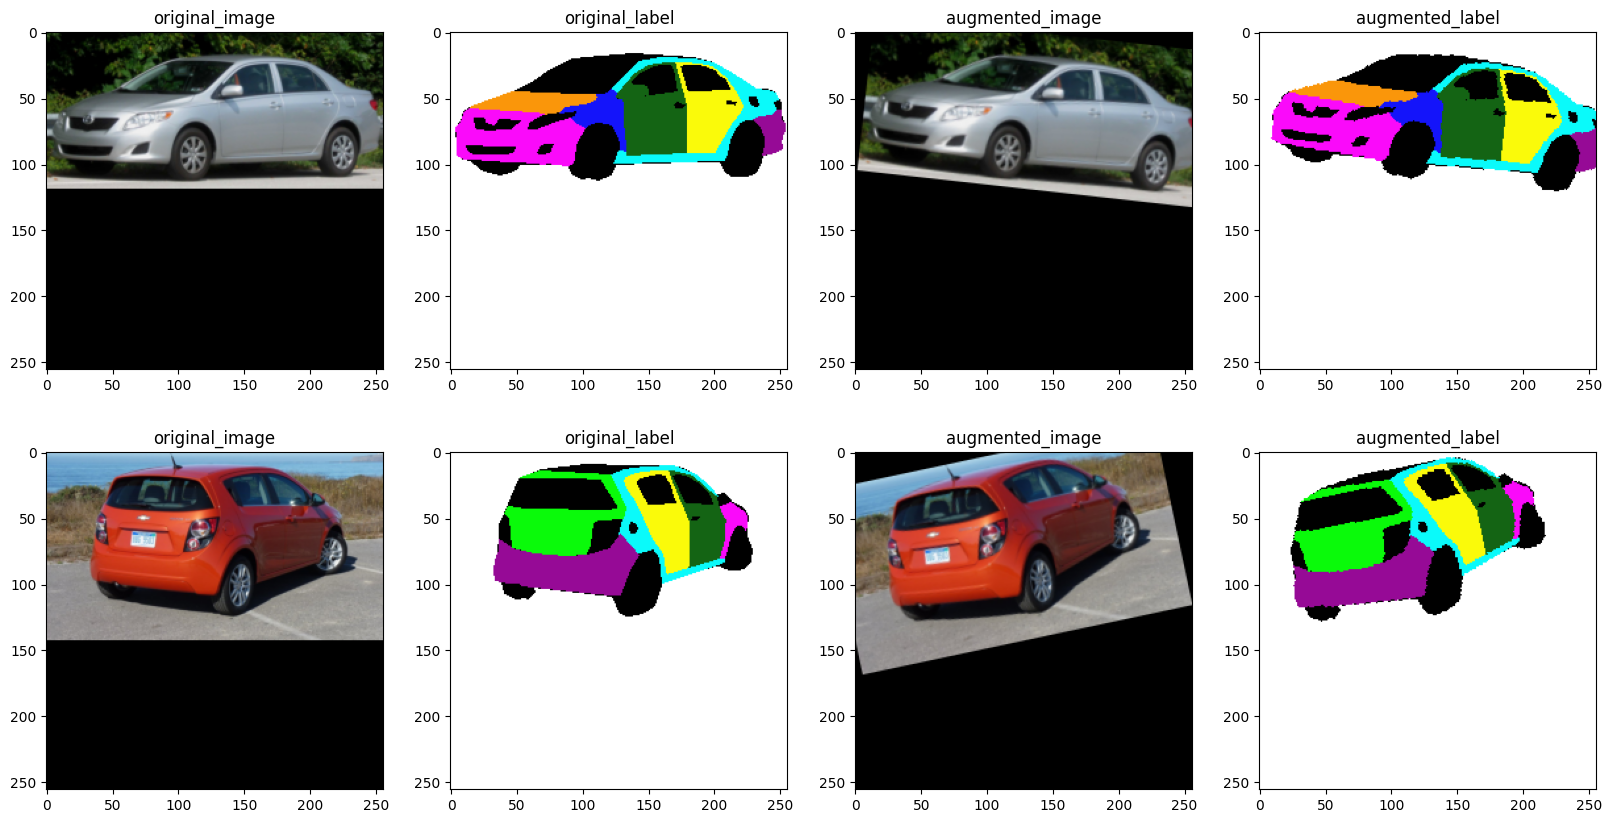

In [19]:
display_augmentation(arrays, rot_arr, n=2)

# Apply different weather conditions

## Fog

In [20]:
seq = iaa.Sequential([iaa.Fog()])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
fog_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

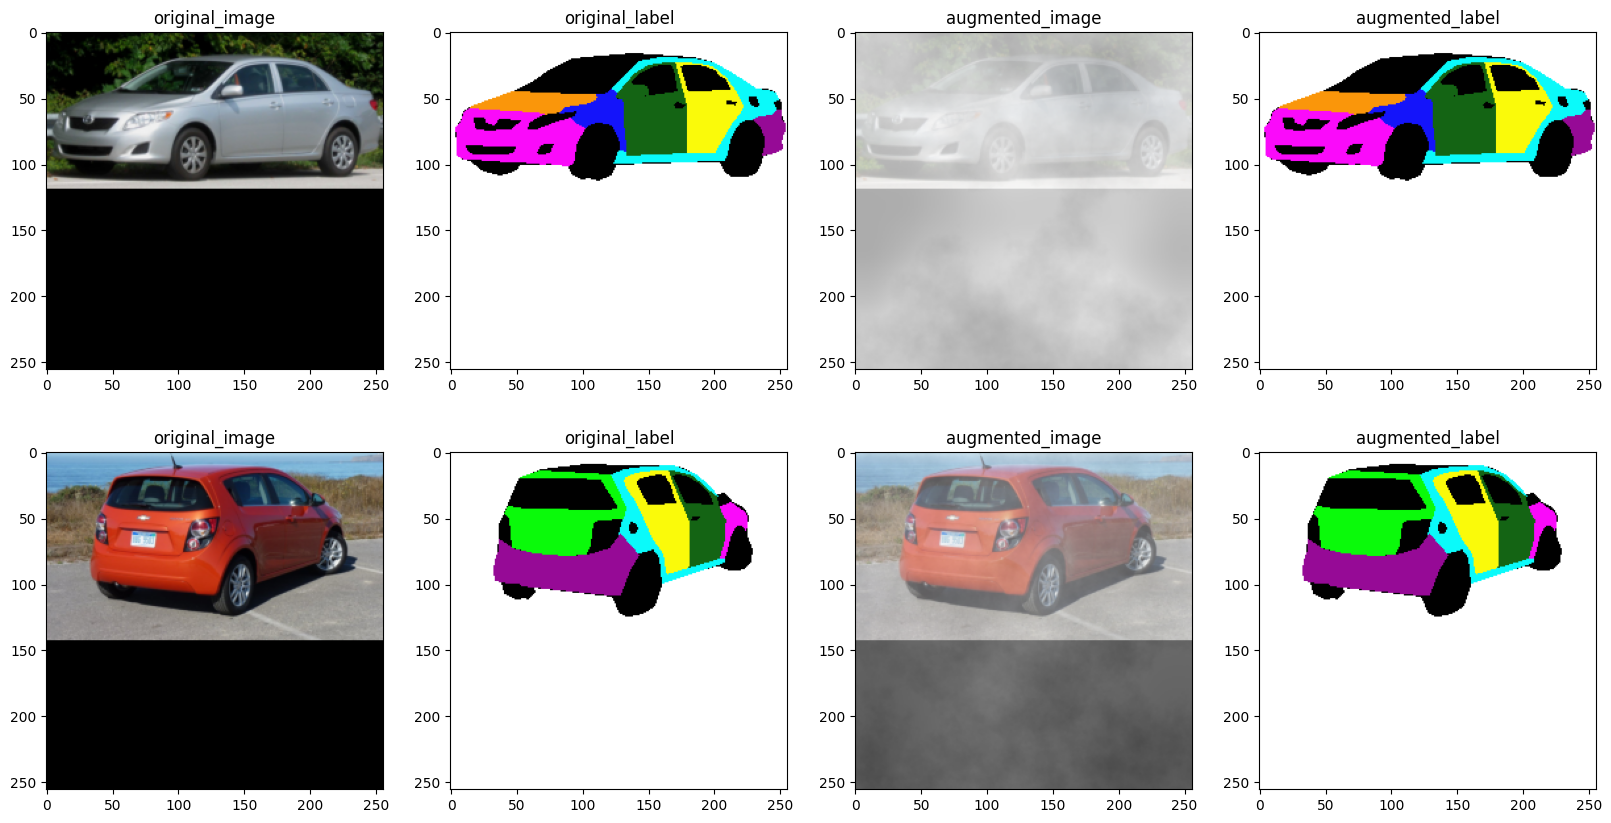

In [21]:
display_augmentation(arrays, fog_arr, n=2)

## Snow

In [22]:
seq = iaa.Sequential([iaa.Snowflakes()])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
snow_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

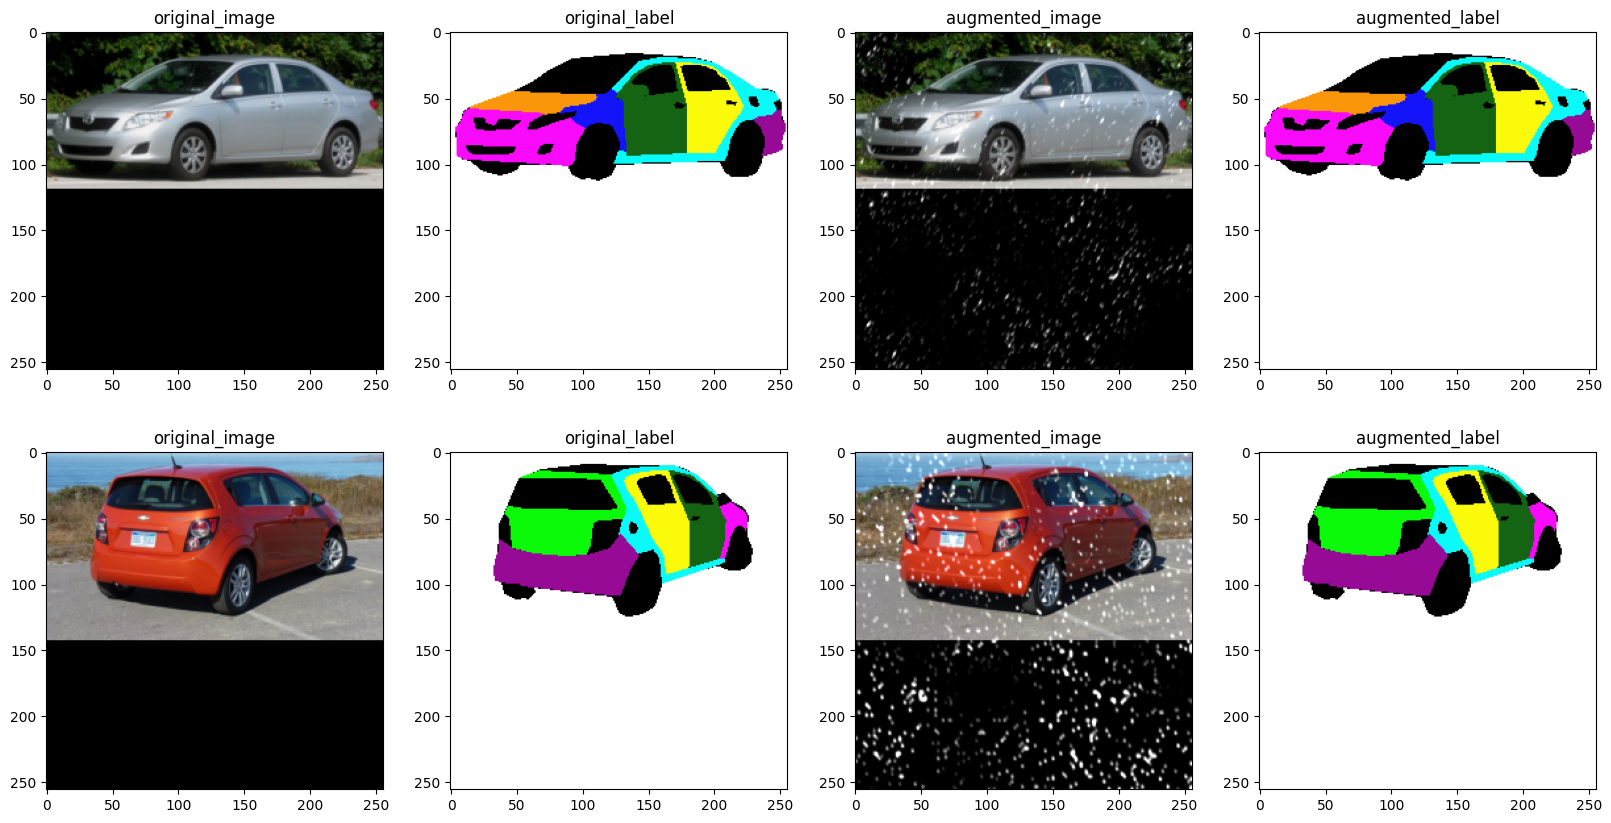

In [23]:
display_augmentation(arrays, snow_arr, n=2)

## Rain

In [24]:
seq = iaa.Sequential([iaa.Rain()])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
rain_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

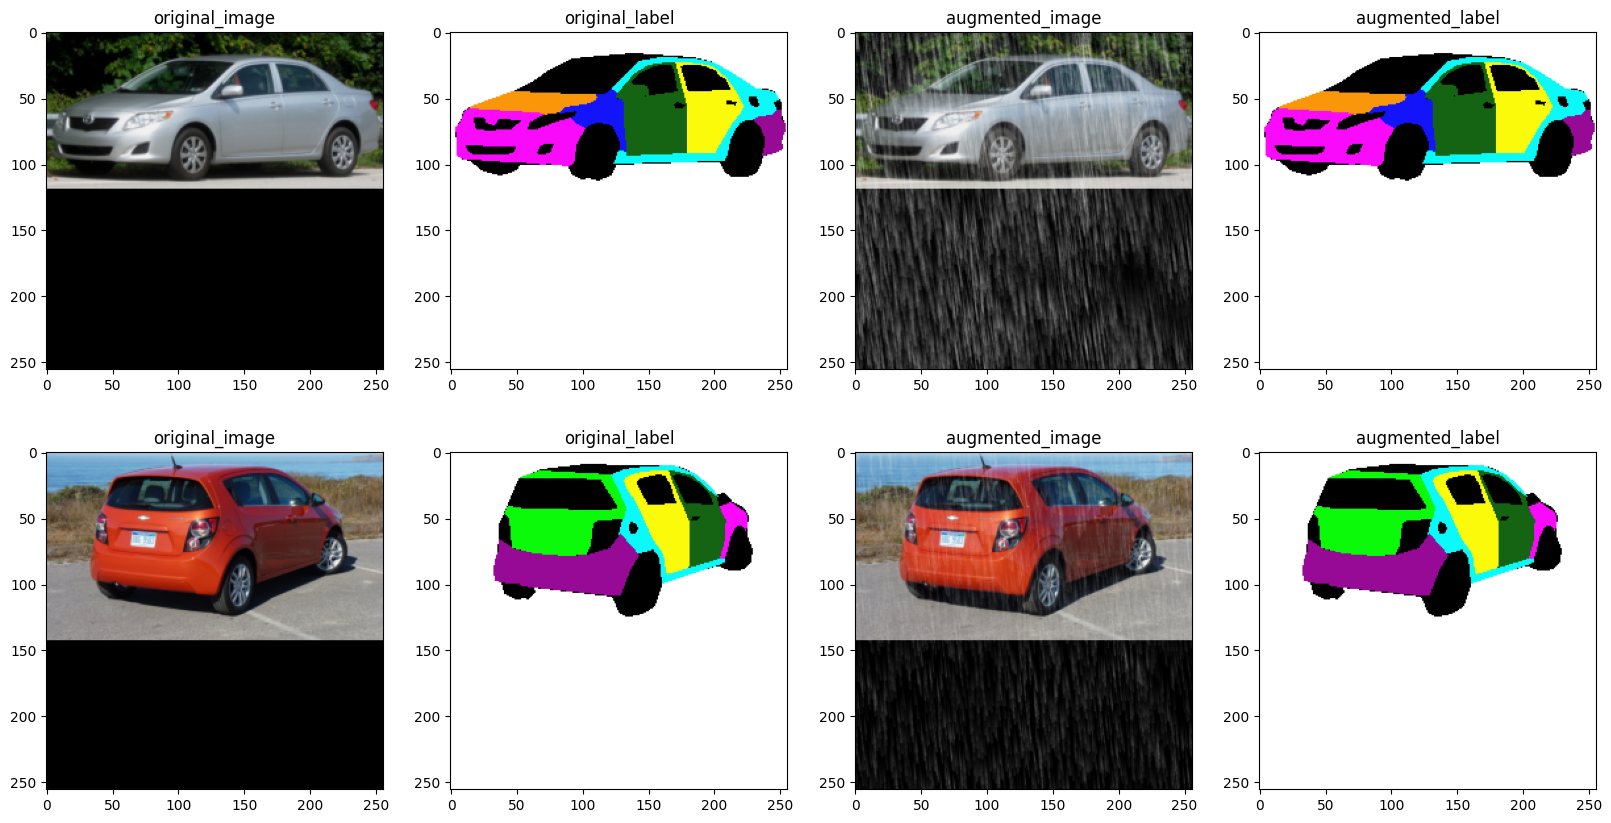

In [25]:
display_augmentation(arrays, rain_arr, n=2)

## Increase the brightness
The brightness in the images are increased by a random factor between 1.2 and 1.6.

In [26]:
seq = iaa.Sequential([iaa.MultiplyBrightness((1.2, 1.6))])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
bright_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

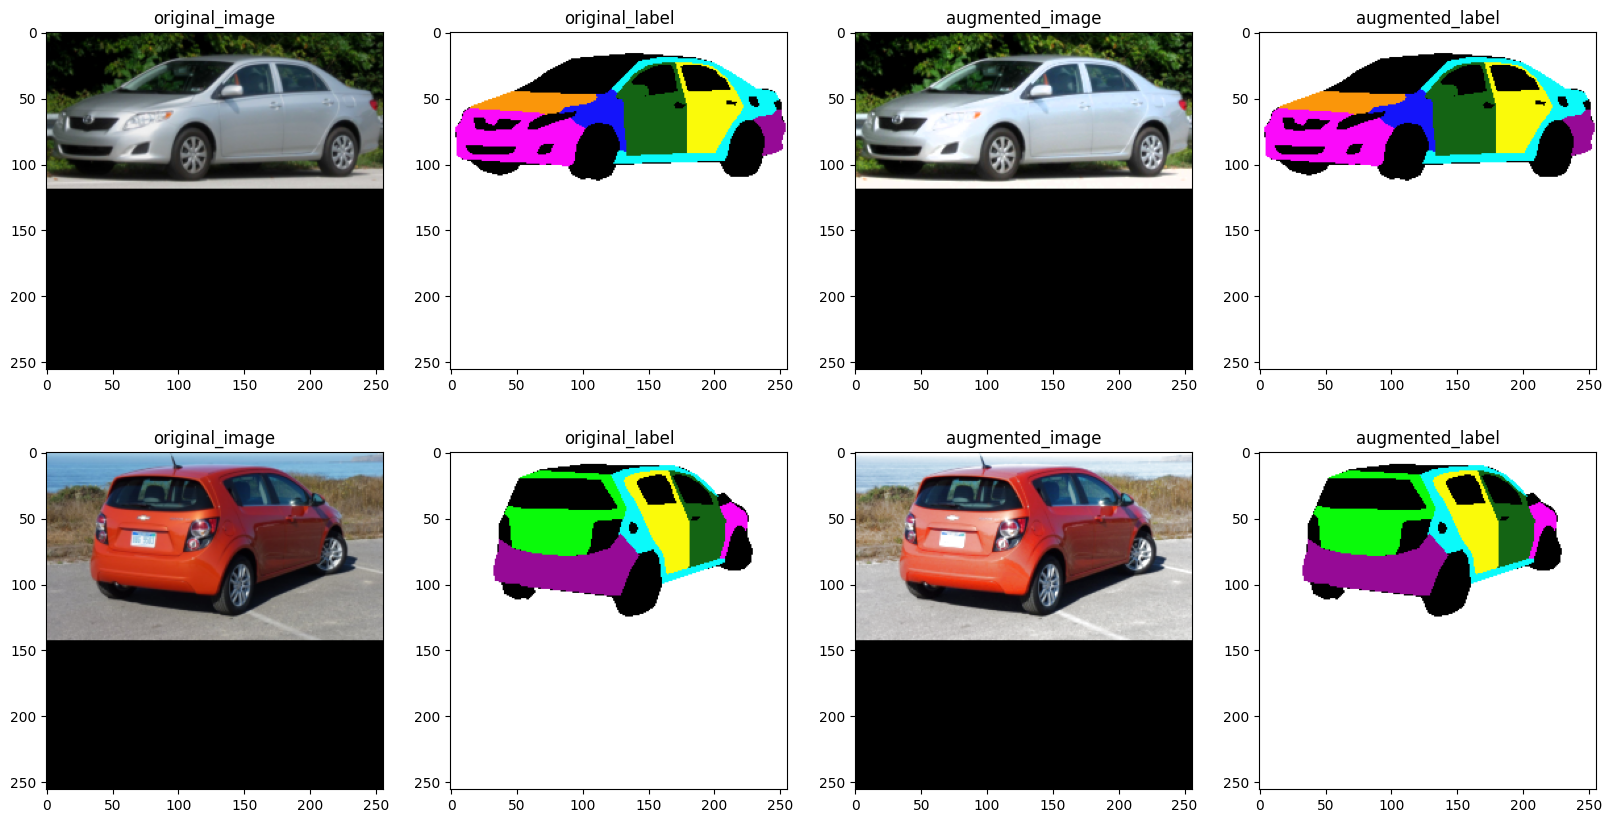

In [27]:
display_augmentation(arrays, bright_arr, n=2)

## Blur the images
Applies a gaussian blur with a random sigma value between 0.7 and 1.5.

In [28]:
seq = iaa.Sequential([iaa.GaussianBlur(sigma=(0.7, 1.5))])
images_aug, segmaps_aug = seq(images=images, segmentation_maps=segmaps)
blur_arr = np.concatenate((images_aug,segmaps_aug), axis = 3)

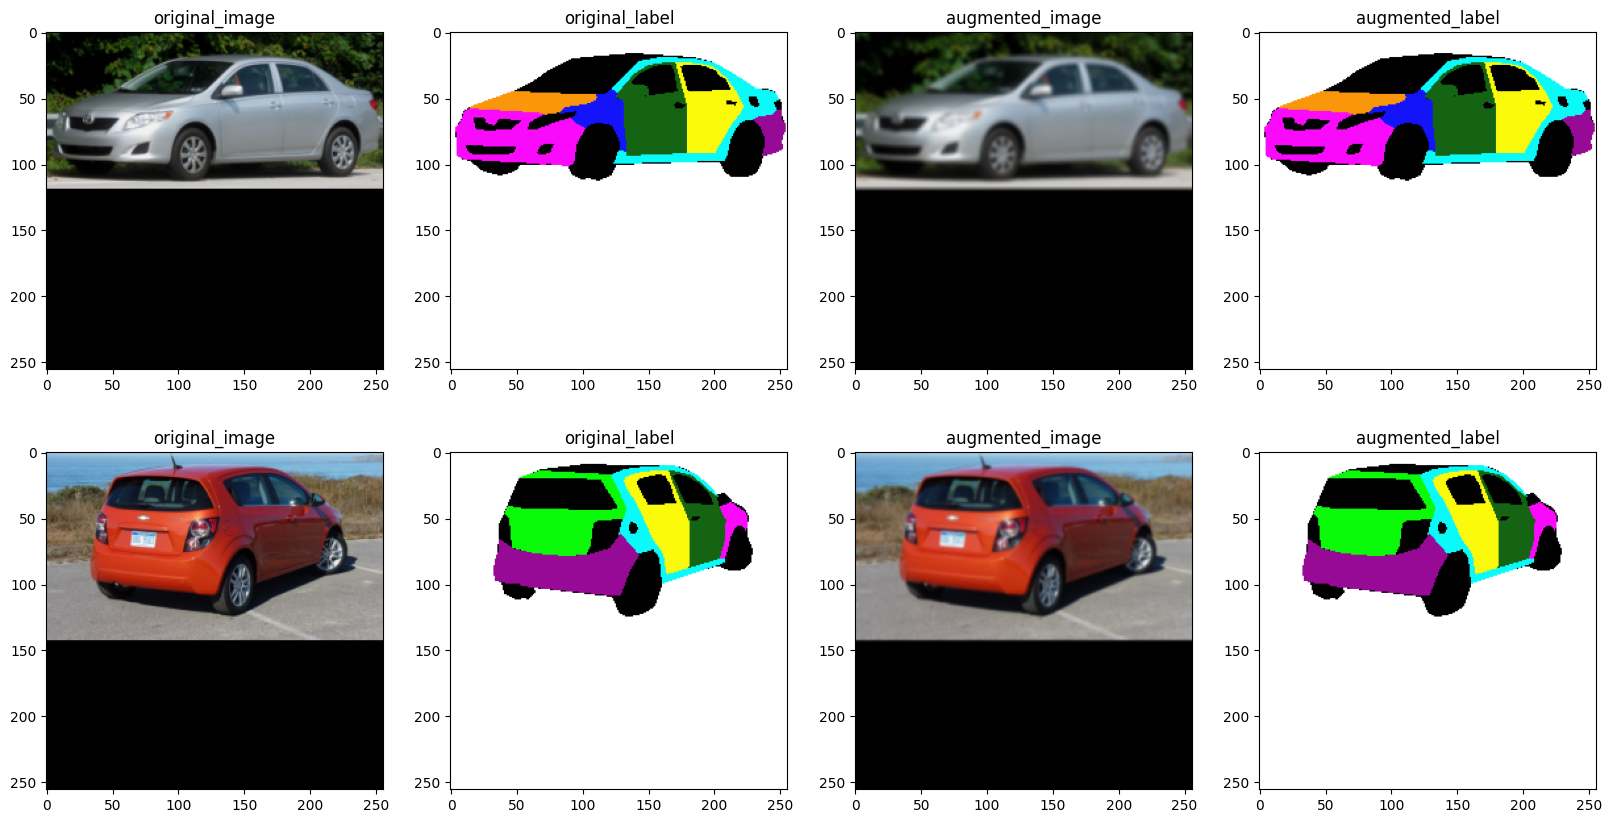

In [29]:
display_augmentation(arrays, blur_arr, n=2)

# Save all the augmented images
This will save all the augmented images, as well as their corresponding augmented mask.  

In [84]:
# Specify the directory to save the augmented images and arrays
img_dir = "../data/augmentation/augmented/images/" 
arr_dir = "../data/augmentation/augmented/arrays/"

In [ ]:
def save_augmentations(img_dir, arr_dir):
    """Function saving all the augmented images and their corresponding arrays.
       The cells performing the augmentations above are expected executed before this function.

    Args:
        img_dir (str): directory to store the augmented images
        arr_dir (str): directory to store the augmented arrays
    """
    all_augmented = [flip_arr, rot_arr, fog_arr, snow_arr, rain_arr, bright_arr, blur_arr]
    file_names = ['flip', 'rot', 'fog', 'snow', 'rain', 'bright', 'blur']

    for array_list, name in zip(all_augmented, file_names):
        i = 0
        for array in array_list:
            img = array[:,:,0:3]
            plt.imsave(os.path.join(img_dir, "{}_{}.png".format(name,i)), img, cmap='plasma')
            np.save(os.path.join(arr_dir, "{}_{}.npy".format(name,i)), array)
            i+=1
